# University Trail

### Importing required libraries

In [2]:
# Importing required libraries
import pandas as pd 
import numpy as np
import os
import glob # Imported to return all file paths that match a specific pattern.
import warnings # Imported to ignore occuring warnings 
import gc # Garbage Collection
import seaborn as sns # Plotting
from sklearn.model_selection import train_test_split # Split the dataset as explored and unexplored data.
import matplotlib.pyplot as plt # Plotting
from numpy.random import seed, randn 
from statsmodels.graphics.gofplots import qqplot # Normality check
import datetime
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
warnings.filterwarnings('ignore')

###  Loading the dataset

* The candidates data from the Raw data is loaded into the  emtpy pandas dataframe.
* glob.glob() function to search for files in the directory and returns a list of file paths that match the specified   pattern, which are the folders containing the data for 35 volunteers.
* The code reads the data from each CSV file and stores it in separate Pandas DataFrame objects: a for accelerometer data,  b for BVP (Blood Volume Pulse) data, c for EDA (Electrodermal Activity) data, d for HR (Heart Rate) data, e for IBI (Interbeat Interval) data, and f for temperature data.
* For each DataFrame, the code adds a "Time(sec)" column to calculate the time in seconds based on the column name and meges the DataFrame
* Forward fill (ffill) and Backward fill (bfill) methods to replace missing values with the previous and subsequent values, respectively, using the fillna() method.
* The merged and processed data for each volunteer is appended to the data DataFrame using the append() method.

In [3]:
# Loading the data using glob module (function used to search for files that match a specific file pattern or name).
data = pd.DataFrame()
#folders = glob.glob(os.path.join("C:/Users/pc/Desktop/Data Science A2/HEMANTH/Stress-Predict-Dataset-main/Raw_data/*"))
folders = glob.glob(os.path.join("C:/Users/heman/DS&DM/Stress-Predict-Dataset-main/Stress-Predict-Dataset-main/Raw_data/*"))
#C:/Users/heman/DS&DM/Stress-Predict-Dataset-main/Stress-Predict-Dataset-main/Raw_data
# Looping into 35 volunteers data (folders) and loading their test results dataset
for i in range(len(folders)):
    files = []
    files.append(glob.glob(folders[i] + '/*.csv'))
    files = sum(files,[])
    
    #Reading Acc
    a = pd.read_csv(files[0])
    a['Time(sec)'] = int(float(a.columns[0])) + a.index
    a.rename({a.columns[0]:'Acc_x',a.columns[1]:'Acc_y',a.columns[2]:'Acc_z'},axis = 1,inplace = True)
    
    #Reading Bvp
    b = pd.read_csv(files[1])
    b['Time(sec)'] = int(float(b.columns[0])) + b.index
    b.rename({b.columns[0]:'Bvp'},axis = 1,inplace = True)
    
    #Reading Eda
    c = pd.read_csv(files[2])
    c['Time(sec)'] = int(float(c.columns[0])) + c.index
    c.rename({c.columns[0]:'Eda'},axis = 1,inplace = True)
    
    #Reading HR
    d = pd.read_csv(files[3])
    d['Time(sec)'] = int(float(d.columns[0])) + d.index
    d.rename({d.columns[0]:'Hr'},axis = 1,inplace = True)
    
    #Reading IBI
    e = pd.read_csv(files[4])
    e['Time(sec)'] = int(float(e.columns[0])) + e.index
    e.rename({e.columns[0]:'Ibi_1',e.columns[1]:'Ibi_2'},axis = 1,inplace = True)
    
    #Reading Temp
    f = pd.read_csv(files[6])
    f['Time(sec)'] = int(float(f.columns[0])) + f.index
    f.rename({f.columns[0]:'Temp'},axis = 1,inplace = True)
    
    #Merhing all the csv based in Time(sec), outer becaause if we do inner we losr more than half values which have null
    new = a.merge(b,on = 'Time(sec)',how = 'outer').merge(c,on = 'Time(sec)',how = 'outer').merge(d,on = 'Time(sec)',how = 'outer').merge(e,on = 'Time(sec)',how = 'outer').merge(f,on = 'Time(sec)',how = 'outer')
    
    new.fillna(method = 'ffill',inplace = True)
    new.fillna(method = 'bfill',inplace = True)
    
    data = data.append(new)

The below code snippet takes the 'Time(sec)' column from the 'data' DataFrame, which presumably contains UNIX timestamps, and applies a lambda function to convert each timestamp to a datetime object using the 'datetime.fromtimestamp()' method from the 'datetime' module in Python.

In [4]:
#Getting datetime attribute from UNIX timestamp
data['date'] = data['Time(sec)'].apply(lambda x: datetime.datetime.fromtimestamp(x))

## Data Description

In [5]:
data.head()

,Acc_x,Acc_y,Acc_z,Time(sec),Bvp,Eda,Hr,Ibi_1,Ibi_2,Temp,date
0,32.0,32.0,32.0,1644226061,64.0,4.000000,1.0,35.484375,0.890625,4.00,2022-02-07 14:57:41
1,-2.0,43.0,43.0,1644226062,0.0,0.000000,1.0,36.343750,0.859375,28.39,2022-02-07 14:57:42
2,-2.0,44.0,46.0,1644226063,0.0,0.112750,1.0,37.296875,0.953125,28.39,2022-02-07 14:57:43
3,2.0,44.0,47.0,1644226064,0.0,0.166563,1.0,38.187500,0.890625,28.39,2022-02-07 14:57:44
4,3.0,43.0,44.0,1644226065,0.0,0.167844,1.0,39.046875,0.859375,28.39,2022-02-07 14:57:45


In [6]:
# Determine the shape of the DataFrame 
data.shape

(7428225, 11)

In [7]:
data.columns

Index(['Acc_x', 'Acc_y', 'Acc_z', 'Time(sec)', 'Bvp', 'Eda', 'Hr', 'Ibi_1',
       'Ibi_2', 'Temp', 'date'],
      dtype='object')

In [8]:
data.dtypes

Acc_x               float64
Acc_y               float64
Acc_z               float64
Time(sec)             int64
Bvp                 float64
Eda                 float64
Hr                  float64
Ibi_1               float64
Ibi_2               float64
Temp                float64
date         datetime64[ns]
dtype: object

In [9]:
# Obtain the summary statistics for numerical columns in our DataFrame.
data.describe()

,Acc_x,Acc_y,Acc_z,Time(sec),Bvp,Eda,Hr,Ibi_1,Ibi_2,Temp
count,7.428225e+06,7.428225e+06,7.428225e+06,7.428225e+06,7.428225e+06,7.428225e+06,7.428225e+06,7.428225e+06,7.428225e+06,7.428225e+06
mean,-1.820556e+01,-8.556537e-01,4.588584e+01,1.645756e+09,2.438605e-03,5.542039e-01,7.663505e+01,3.183453e+03,8.422947e-01,3.038850e+01
std,2.940956e+01,1.743744e+01,2.238250e+01,8.438921e+05,7.165202e+01,6.932219e-01,1.330808e+01,2.599010e+02,1.752937e-01,2.633649e+00
min,-1.280000e+02,-1.280000e+02,-1.280000e+02,1.644226e+09,-2.751640e+03,0.000000e+00,1.000000e+00,1.148438e+01,3.125000e-01,4.000000e+00
25%,-4.100000e+01,-7.000000e+00,3.600000e+01,1.644980e+09,-1.461000e+01,1.412130e-01,6.575000e+01,3.092406e+03,7.187500e-01,2.875000e+01
50%,-1.900000e+01,1.000000e+00,5.600000e+01,1.645646e+09,1.210000e+00,2.987990e-01,7.402000e+01,3.252688e+03,8.281250e-01,3.059000e+01
75%,1.000000e+00,8.000000e+00,6.100000e+01,1.646670e+09,1.546000e+01,7.333020e-01,8.582000e+01,3.313234e+03,9.531250e-01,3.167000e+01
max,1.270000e+02,1.270000e+02,1.270000e+02,1.647065e+09,2.102490e+03,1.100507e+01,1.467800e+02,3.542312e+03,1.703125e+00,3.639000e+01


In [10]:
# Check for null values.
data.isnull().sum()

Acc_x        0
Acc_y        0
Acc_z        0
Time(sec)    0
Bvp          0
Eda          0
Hr           0
Ibi_1        0
Ibi_2        0
Temp         0
date         0
dtype: int64

In [11]:
# Check for duplicate values.
data.duplicated().sum()

0

# Merging with preprocessed to get the Label

In [12]:
#Processed data to get the Label.
#processed = pd.read_csv(r"C:\Users\pc\Desktop\Data Science A2\HEMANTH\Stress-Predict-Dataset-main\Processed_data\Improved_All_Combined_hr_rsp_binary.csv")
processed = pd.read_csv(r"C:/Users/heman/DS&DM/Stress-Predict-Dataset-main/Stress-Predict-Dataset-main/Processed_data/Improved_All_Combined_hr_rsp_binary.csv")

In [13]:
processed.head()

,Participant,HR,respr,Time(sec),Label
0,2,118.00,12.127693,1644227583,0
1,2,113.50,12.127693,1644227584,0
2,2,93.00,12.127693,1644227585,0
3,2,93.25,12.127693,1644227586,0
4,2,86.40,12.127693,1644227587,0


In [14]:
#Merging based on Time(sec) to get the label
data = data.merge(processed[['Time(sec)','Label']],on = 'Time(sec)',how = 'inner')

In [15]:
data.head()

,Acc_x,Acc_y,Acc_z,Time(sec),Bvp,Eda,Hr,Ibi_1,Ibi_2,Temp,date,Label
0,-17.0,17.0,59.0,1644227583,-12.38,0.231907,69.52,2856.468750,1.21875,28.47,2022-02-07 15:23:03,0
1,-12.0,10.0,69.0,1644227583,-0.00,0.667881,1.00,684.953125,0.81250,34.79,2022-02-07 15:23:03,0
2,-16.0,17.0,59.0,1644227584,-7.21,0.233188,68.98,2856.468750,1.21875,28.47,2022-02-07 15:23:04,0
3,-9.0,11.0,72.0,1644227584,-0.00,0.660192,1.00,718.156250,0.71875,34.79,2022-02-07 15:23:04,0
4,-16.0,17.0,59.0,1644227585,-1.68,0.233188,68.42,2856.468750,1.21875,28.47,2022-02-07 15:23:05,0


# Checking balance of data for 0 and 1 ratio

In [16]:
#count of imbalanced data
data['Label'].value_counts()

0    345509
1    163517
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

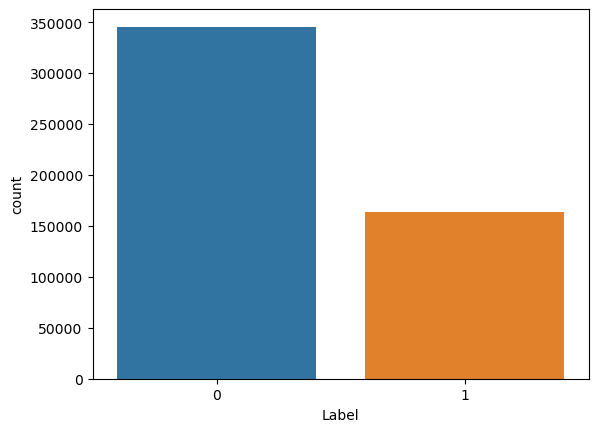

In [17]:
#Seaborn visulization of imbalanced data
sns.countplot(data['Label'])

# Resampling to handle the imbalanced data

The below code snippet performs manual balancing of data by randomly selecting samples from the majority class (class 0) to match the number of samples in the minority class (class 1) in a dataset. This way the is retained and loss of data is prevented.

In [18]:
#manual Balance of data by random choice of majority class to match the minority class

class0 = np.where(data['Label'] == 0)[0]
class1 =np.where(data['Label'] == 1)[0]

#downsampled index of random choice for 0 from dataset
class0_downsampled = np.random.choice(class0, size=class1.shape[0], replace=False)

#All index of balanced 1 and 0
resampled_index = np.hstack((class1 ,class0_downsampled))

In [19]:
data = data.iloc[resampled_index]

In [20]:
data.reset_index(inplace = True,drop = True)

In [21]:
data.head()

,Acc_x,Acc_y,Acc_z,Time(sec),Bvp,Eda,Hr,Ibi_1,Ibi_2,Temp,date,Label
0,-15.0,16.0,59.0,1644228196,8.82,0.267782,75.18,2856.468750,1.218750,28.63,2022-02-07 15:33:16,1
1,-61.0,-19.0,-1.0,1644228196,39.46,0.266800,70.32,3448.484375,0.953125,35.66,2022-02-07 15:33:16,1
2,-16.0,17.0,59.0,1644228197,7.98,0.267782,75.10,2856.468750,1.218750,28.63,2022-02-07 15:33:17,1
3,-61.0,-20.0,-2.0,1644228197,42.95,0.265518,70.35,3448.484375,0.953125,35.66,2022-02-07 15:33:17,1
4,-15.0,17.0,60.0,1644228198,7.43,0.267782,75.03,2856.468750,1.218750,28.65,2022-02-07 15:33:18,1


In [22]:
data['Label'].value_counts()

1    163517
0    163517
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

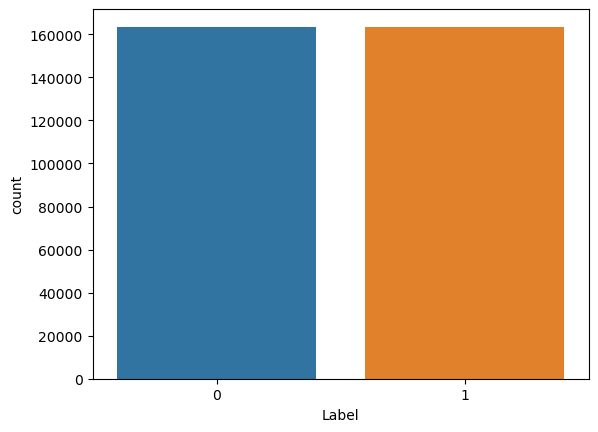

In [23]:
#Countplot after balancing the data
sns.countplot(data['Label'])

## Check for normality Distribution. 

A histogram is a graphical representation of data that shows the distribution of values within a dataset. It is commonly used to visualize the frequency or count of data points falling into different ranges or bins.By examining the histogram of a dataset, we can visually assess if the data follows a normal distribution. If the histogram shows a symmetrical bell-shaped curve with no skewness, it may indicate a normal distribution. However, if the histogram displays significant asymmetry or lacks a bell-shaped curve, it may suggest that the data does not follow a normal distribution.
By looking at the below plot, it can be determined that data is not normally distributed.

array([[<AxesSubplot:title={'center':'Acc_x'}>,
        <AxesSubplot:title={'center':'Acc_y'}>,
        <AxesSubplot:title={'center':'Acc_z'}>],
       [<AxesSubplot:title={'center':'Time(sec)'}>,
        <AxesSubplot:title={'center':'Bvp'}>,
        <AxesSubplot:title={'center':'Eda'}>],
       [<AxesSubplot:title={'center':'Hr'}>,
        <AxesSubplot:title={'center':'Ibi_1'}>,
        <AxesSubplot:title={'center':'Ibi_2'}>],
       [<AxesSubplot:title={'center':'Temp'}>,
        <AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'Label'}>]], dtype=object)

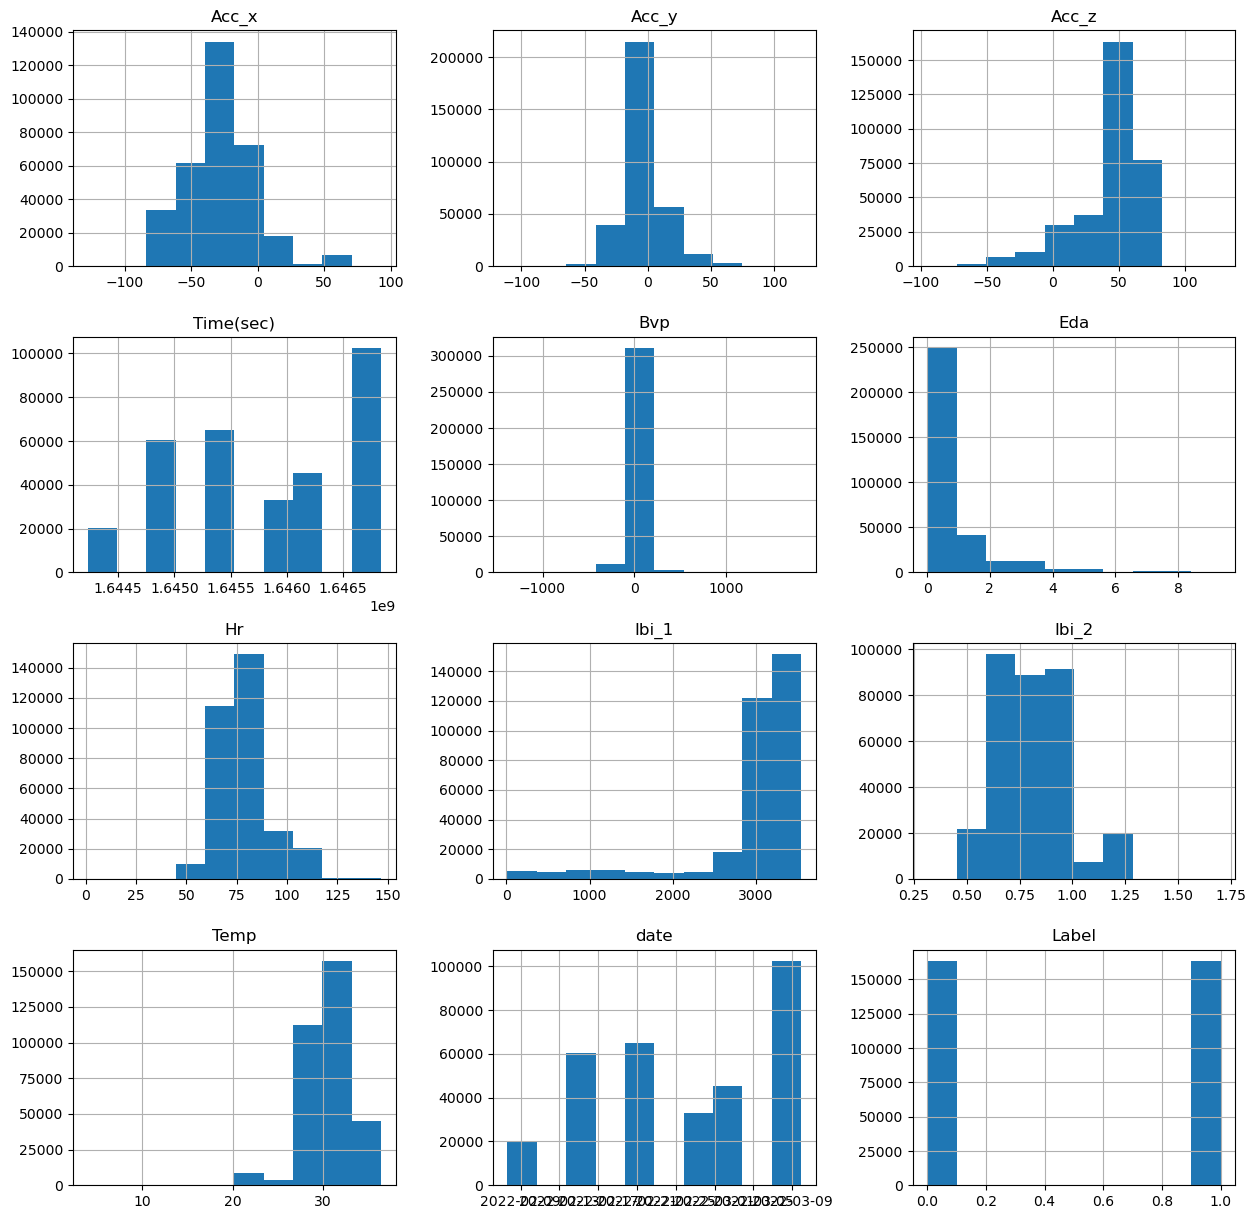

In [24]:
#checking if the data is skewed or not
data.hist(figsize = (15,15))

# Time series representation of the data exploration

The below plots represents the change in values of the Accelerometer and Blood Valume pluse data with respect to the date it was recorded. This shows when the candidates were experiencing stress at the most.

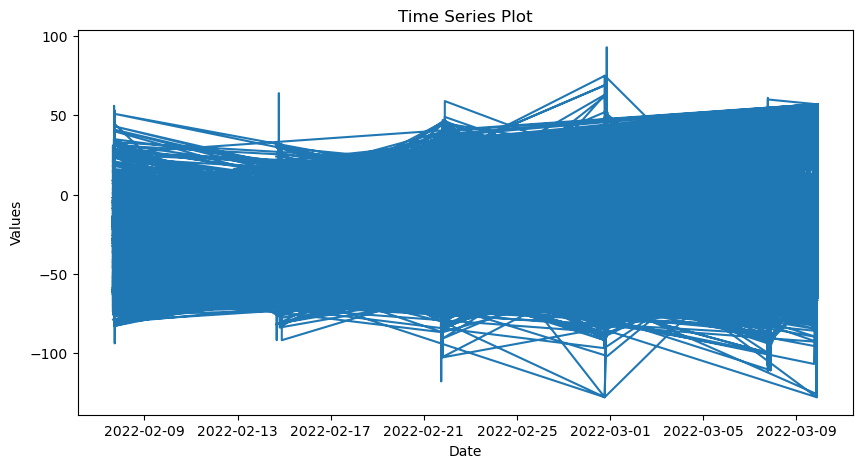

In [25]:
# Create plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data.date, data['Acc_x'])

# Set plot title and axis labels
ax.set_title('Time Series Plot')
ax.set_xlabel('Date')
ax.set_ylabel('Values')

# Show plot
plt.show()

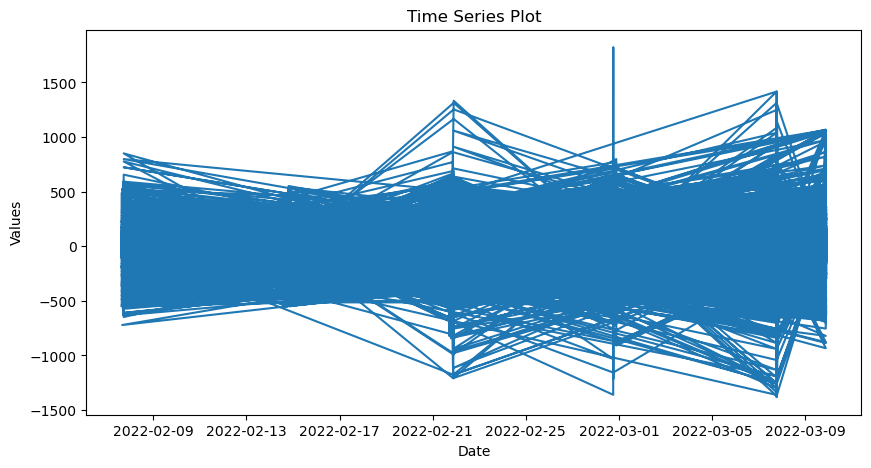

In [26]:
# Create plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data.date, data['Bvp'])

# Set plot title and axis labels
ax.set_title('Time Series Plot')
ax.set_xlabel('Date')
ax.set_ylabel('Values')

# Show plot
plt.show()

### Split  subset of data separate from the exploration to avoid overfitting.

In [27]:
# Split data by taking 20% as test data and 80% for further exploration.
explore_data, unexplore_data = train_test_split(data, test_size=0.2, random_state=25)

### Create and assign values into the target column  

In [28]:
# Obtain the summary statistics for numerical columns in explore_data DataFrame.
explore_data.describe()

,Acc_x,Acc_y,Acc_z,Time(sec),Bvp,Eda,Hr,Ibi_1,Ibi_2,Temp,Label
count,261627.000000,261627.000000,261627.000000,2.616270e+05,261627.000000,261627.000000,261627.000000,261627.000000,261627.000000,261627.000000,261627.000000
mean,-27.847852,-2.879856,43.808644,1.645818e+09,0.052693,0.769013,78.876438,2971.805964,0.810920,30.433995,0.499688
std,23.970106,15.247069,24.838121,8.063722e+05,74.194406,1.160541,13.788667,678.196633,0.165140,2.759995,0.500001
min,-128.000000,-111.000000,-95.000000,1.644228e+09,-1382.970000,0.000000,1.000000,11.843750,0.312500,4.000000,0.000000
25%,-46.000000,-11.000000,36.000000,1.645436e+09,-14.360000,0.166563,68.830000,3011.609375,0.703125,28.590000,0.000000
50%,-28.000000,-3.000000,55.000000,1.646052e+09,1.230000,0.297251,76.120000,3176.156250,0.796875,30.550000,0.000000
75%,-15.000000,4.000000,60.000000,1.646660e+09,16.030000,0.890861,86.050000,3299.843750,0.875000,32.160000,1.000000
max,93.000000,121.000000,127.000000,1.646842e+09,1822.090000,9.366458,146.780000,3542.312499,1.703125,36.390000,1.000000


### Find the correlation of each column in a DataFrame.

In [29]:
#checking the correlation of all attribute to dependent variable
explore_data.corr()

,Acc_x,Acc_y,Acc_z,Time(sec),Bvp,Eda,Hr,Ibi_1,Ibi_2,Temp,Label
Acc_x,1.000000,0.212093,0.500974,0.039675,-0.002656,-0.071187,0.238376,-0.023556,-0.122308,-0.323895,0.003389
Acc_y,0.212093,1.000000,-0.037550,0.035533,-0.000239,0.047328,0.008273,-0.116322,-0.104560,-0.230717,-0.020849
Acc_z,0.500974,-0.037550,1.000000,-0.063539,-0.007616,0.017689,0.001556,-0.006458,0.060624,-0.011649,0.015831
Time(sec),0.039675,0.035533,-0.063539,1.000000,0.001413,-0.273279,0.022710,0.078614,-0.184227,-0.200498,0.006950
Bvp,-0.002656,-0.000239,-0.007616,0.001413,1.000000,0.002603,0.000172,0.001213,-0.001288,-0.003742,-0.002834
Eda,-0.071187,0.047328,0.017689,-0.273279,0.002603,1.000000,0.067941,0.046911,0.046470,0.117653,0.007459
Hr,0.238376,0.008273,0.001556,0.022710,0.000172,0.067941,1.000000,-0.013464,-0.506457,-0.387450,0.024686
Ibi_1,-0.023556,-0.116322,-0.006458,0.078614,0.001213,0.046911,-0.013464,1.000000,0.086184,-0.037209,0.026718
Ibi_2,-0.122308,-0.104560,0.060624,-0.184227,-0.001288,0.046470,-0.506457,0.086184,1.000000,0.341767,-0.007139
Temp,-0.323895,-0.230717,-0.011649,-0.200498,-0.003742,0.117653,-0.387450,-0.037209,0.341767,1.000000,-0.005983


 From the above correlation table, determining stress is highly correlated with Acc_z,Eda, Hr and Ibi_2.
It shows that acceleration of motion of body z axis along with Electrodermal Activity and Heart-rate are the major factors of stress.

<AxesSubplot:>

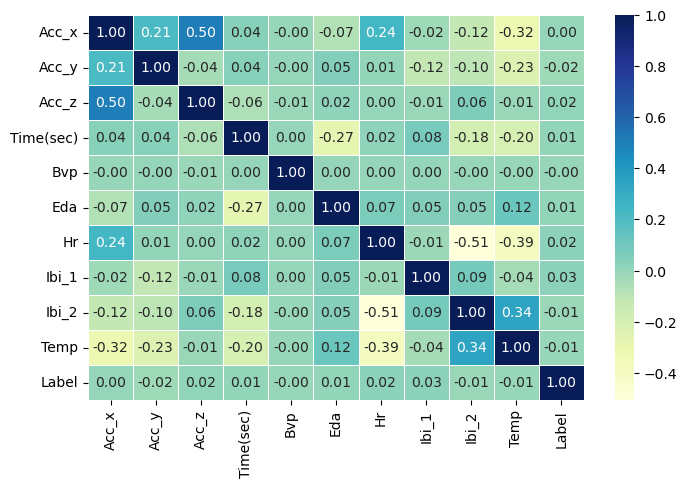

In [30]:
# Plotting the heatmap for correlation
corr_matrix = explore_data.corr()
plt.figure(figsize = (8, 5))
sns.heatmap(corr_matrix, annot = True, linewidth = 0.5, fmt = ".2f", cmap = "YlGnBu")

# Model Building

# Random Forest

In [31]:
rdf = RandomForestClassifier(max_depth=2, random_state=0)
rdf.fit(explore_data.drop({'Label','date'},axis = 1), explore_data['Label'])

RandomForestClassifier(max_depth=2, random_state=0)

In [32]:
rdf_pred = rdf.predict(unexplore_data.drop({'Label','date'},axis = 1))

In [33]:
print(classification_report(unexplore_data['Label'], rdf_pred))

              precision    recall  f1-score   support

           0       0.73      0.13      0.22     32622
           1       0.52      0.95      0.68     32785

    accuracy                           0.54     65407
   macro avg       0.62      0.54      0.45     65407
weighted avg       0.62      0.54      0.45     65407



In [34]:
cm = confusion_matrix(unexplore_data['Label'], rdf_pred)
cm

array([[ 4222, 28400],
       [ 1595, 31190]], dtype=int64)

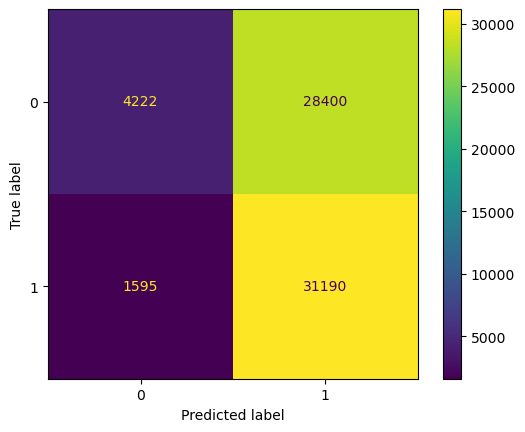

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Finding which all feature play an important role in model evaluation.

In [52]:
# Get feature importances from RandomForestClassifier
feature_importance = rdf.feature_importances_

# Get column names from the data used to train the model
columns = explore_data.drop(['Label', 'date'], axis=1).columns

# Print feature importances with column names
print("Feature Importance:")
for i in range(len(feature_importance)):
    print(f"Feature '{columns[i]}': {feature_importance[i]}")


Feature Importance:
Feature 'Acc_x': 0.017676453221082463
Feature 'Acc_y': 0.0646399602986702
Feature 'Acc_z': 0.10951880962607234
Feature 'Time(sec)': 0.399771587575664
Feature 'Bvp': 0.0030219541899028065
Feature 'Eda': 0.020069818177957086
Feature 'Hr': 0.02839672131820462
Feature 'Ibi_1': 0.2855793203296448
Feature 'Ibi_2': 0.005978424709186398
Feature 'Temp': 0.06534695055361536


# Logistic Regression

In [37]:
lr = LogisticRegression(random_state=0).fit(explore_data.drop({'Label','date'},axis = 1), explore_data['Label'])
lr_pred = lr.predict(unexplore_data.drop({'Label','date'},axis = 1))

In [38]:
print(classification_report(unexplore_data['Label'], lr_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     32622
           1       0.00      0.00      0.00     32785

    accuracy                           0.50     65407
   macro avg       0.25      0.50      0.33     65407
weighted avg       0.25      0.50      0.33     65407



In [39]:
cm = confusion_matrix(unexplore_data['Label'], lr_pred)
cm

array([[32622,     0],
       [32785,     0]], dtype=int64)

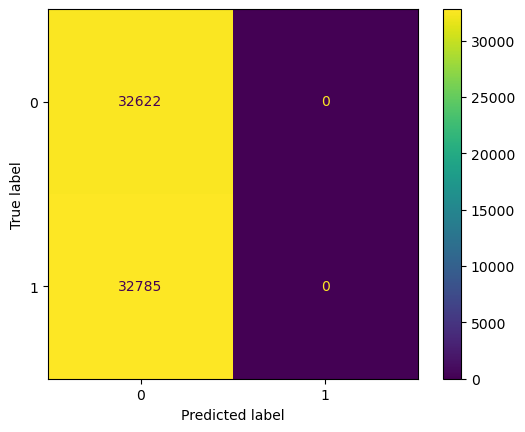

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Finding which all feature play an important role in model evaluation.

In [53]:
# Get feature importances from logistic regression
feature_importance = np.abs(lr.coef_[0])

# Get column names from the data used to train the model
columns = explore_data.drop(['Label', 'date'], axis=1).columns

# Print feature importances with column names
print("Feature Importance:")
for i in range(len(feature_importance)):
    print(f"Feature '{columns[i]}': {feature_importance[i]}")


Feature Importance:
Feature 'Acc_x': 5.1765014716851445e-18
Feature 'Acc_y': 2.018385736920101e-17
Feature 'Acc_z': 2.4939384866054427e-17
Feature 'Time(sec)': 7.530164220912427e-13
Feature 'Bvp': 1.3353132908545514e-17
Feature 'Eda': 5.49167631274134e-19
Feature 'Hr': 2.1561372287750892e-17
Feature 'Ibi_1': 1.1486128732318123e-15
Feature 'Ibi_2': 7.540496197719829e-20
Feature 'Temp': 1.0691417203875953e-18


# Naive bayes

In [42]:
gnb = GaussianNB().fit(explore_data.drop({'Label','date'},axis = 1), explore_data['Label'])

gnb_pred = gnb.predict(unexplore_data.drop({'Label','date'},axis = 1))

In [43]:
print(classification_report(unexplore_data['Label'], gnb_pred))

              precision    recall  f1-score   support

           0       0.50      0.13      0.21     32622
           1       0.50      0.87      0.64     32785

    accuracy                           0.50     65407
   macro avg       0.50      0.50      0.42     65407
weighted avg       0.50      0.50      0.42     65407



In [44]:
cm = confusion_matrix(unexplore_data['Label'], gnb_pred)
cm

array([[ 4321, 28301],
       [ 4312, 28473]], dtype=int64)

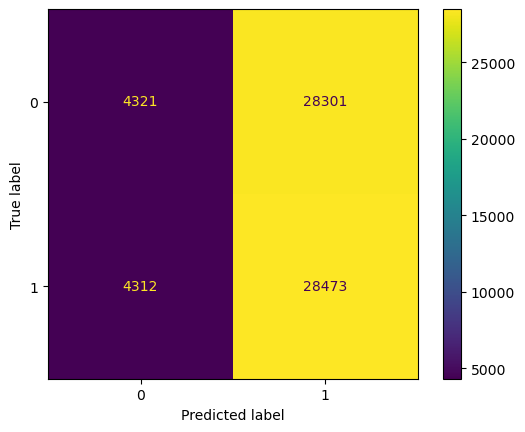

In [45]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Finding which all feature play an important role in model evaluation.

In [54]:
# Calculate means and variances for each feature in each class
class_means = gnb.theta_
class_variances = gnb.sigma_

# Compute differences in means and variances
mean_diff = np.abs(class_means[1] - class_means[0])
variance_diff = np.abs(class_variances[1] - class_variances[0])

# Calculate feature importance as the sum of mean and variance differences
feature_importance = mean_diff + variance_diff

# Get column names from the data used to train the model
columns = explore_data.drop(['Label', 'date'], axis=1).columns

# Print feature importances with column names
print("Feature Importance:")
for i in range(len(feature_importance)):
    print(f"Feature '{columns[i]}': {feature_importance[i]}")


Feature Importance:
Feature 'Acc_x': 9.601702234733441
Feature 'Acc_y': 18.56794832713331
Feature 'Acc_z': 57.46234385750501
Feature 'Time(sec)': 17061331984.503265
Feature 'Bvp': 179.13035743165972
Feature 'Eda': 0.19436175032863812
Feature 'Hr': 7.780921976993056
Feature 'Ibi_1': 155776.22984056413
Feature 'Ibi_2': 0.0025932239181749583
Feature 'Temp': 0.11103247396945903


# Ada Boost

In [47]:
ada = AdaBoostClassifier(n_estimators=10, random_state=0)
ada.fit(explore_data.drop({'Label','date'},axis = 1), explore_data['Label'])

ada_pred = ada.predict(unexplore_data.drop({'Label','date'},axis = 1))

In [48]:
print(classification_report(unexplore_data['Label'], ada_pred))

              precision    recall  f1-score   support

           0       0.87      0.11      0.20     32622
           1       0.53      0.98      0.69     32785

    accuracy                           0.55     65407
   macro avg       0.70      0.55      0.44     65407
weighted avg       0.70      0.55      0.44     65407



In [49]:
cm = confusion_matrix(unexplore_data['Label'], ada_pred)
cm

array([[ 3644, 28978],
       [  534, 32251]], dtype=int64)

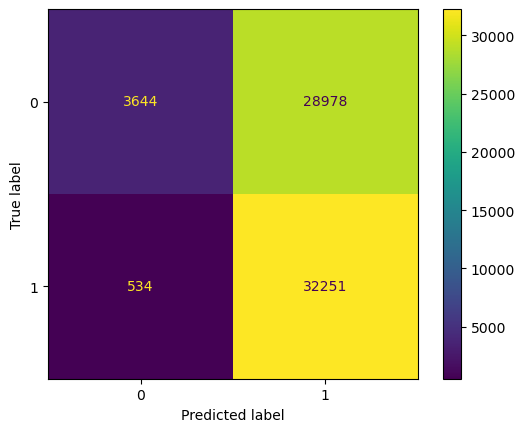

In [50]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()